# Inter-State Traffic Prediction

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor , export_graphviz , plot_tree 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
df= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [107]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,3539,None,243.39,0.0,0.0,20,Clouds,few clouds,02/10/12 19:00
1,2784,None,243.62,0.0,0.0,1,Clear,sky is clear,02/10/12 20:00
2,2361,None,244.22,0.0,0.0,1,Clear,sky is clear,02/10/12 21:00
3,1529,None,244.82,0.0,0.0,1,Clear,sky is clear,02/10/12 22:00
4,963,None,244.82,0.0,0.0,1,Clear,sky is clear,02/10/12 23:00


## EDA

In [108]:
df.shape

(48194, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48194 entries, 0 to 48193
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48194 non-null  int64  
 1   holiday              48194 non-null  object 
 2   temp                 48194 non-null  float64
 3   rain_1h              48194 non-null  float64
 4   snow_1h              48194 non-null  float64
 5   clouds_all           48194 non-null  int64  
 6   weather_main         48194 non-null  object 
 7   weather_description  48194 non-null  object 
 8   date_time            48194 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [110]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [111]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48194.0,3259.413433,1986.856265,0.00,1192.0000,3379.00,4933.00,7280.00
temp,48194.0,281.264219,12.709587,243.39,272.1825,282.46,291.81,310.07
rain_1h,48194.0,0.334333,44.793779,0.00,0.0000,0.00,0.00,9831.30
snow_1h,48194.0,0.000222,0.008168,0.00,0.0000,0.00,0.00,0.51
clouds_all,48194.0,49.363904,39.016223,0.00,1.0000,64.00,90.00,100.00


In [112]:
df['weather_main'].value_counts()

Clouds          15157
Clear           13388
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [113]:
df['holiday'].value_counts()

None                         48133
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [114]:
df['temp'].value_counts()

274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
263.990      1
264.040      1
264.060      1
264.100      1
310.070      1
Name: temp, Length: 5842, dtype: int64

In [115]:
df['date_time']=pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df.drop('date_time',axis=1,inplace = True)

In [116]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,3539,None,243.39,0.0,0.0,20,Clouds,few clouds,Friday,2,2012,19
1,2784,None,243.62,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,20
2,2361,None,244.22,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,21
3,1529,None,244.82,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,22
4,963,None,244.82,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,23


### Univariate Analysis

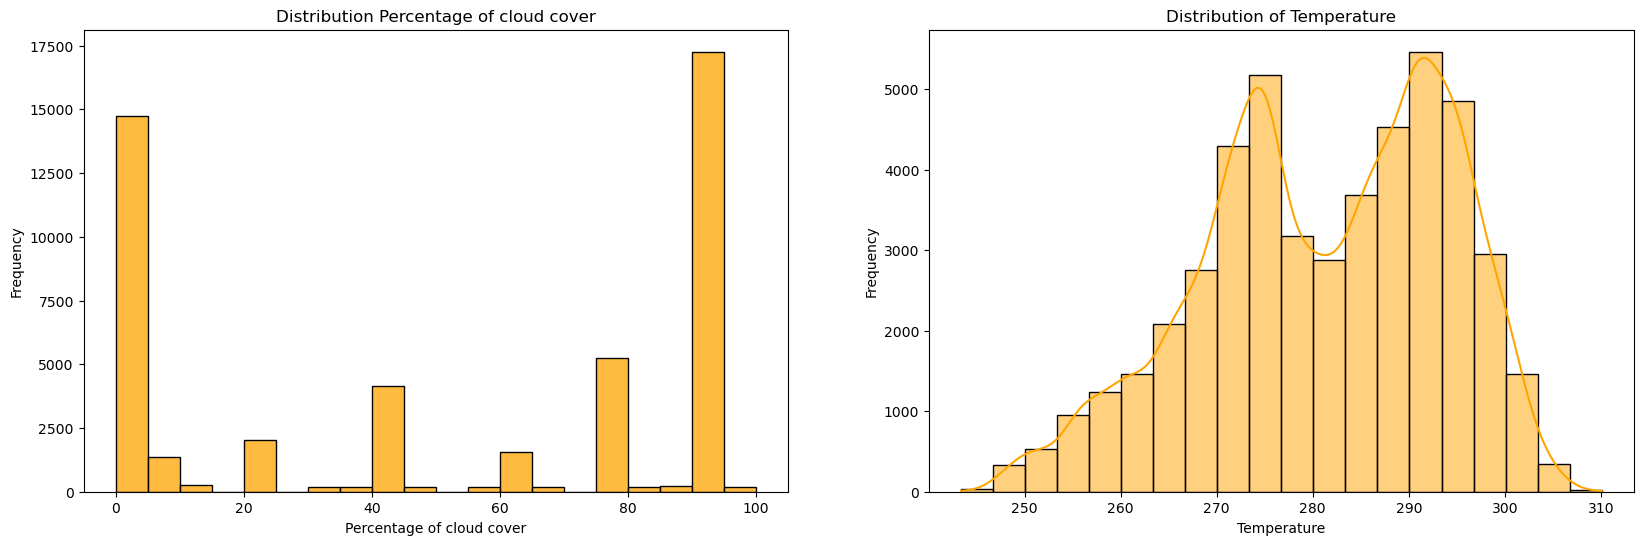

In [117]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['clouds_all'], bins=20, color='orange')
plt.title('Distribution Percentage of cloud cover')
plt.xlabel('Percentage of cloud cover')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['temp'], bins=20, kde=True,color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

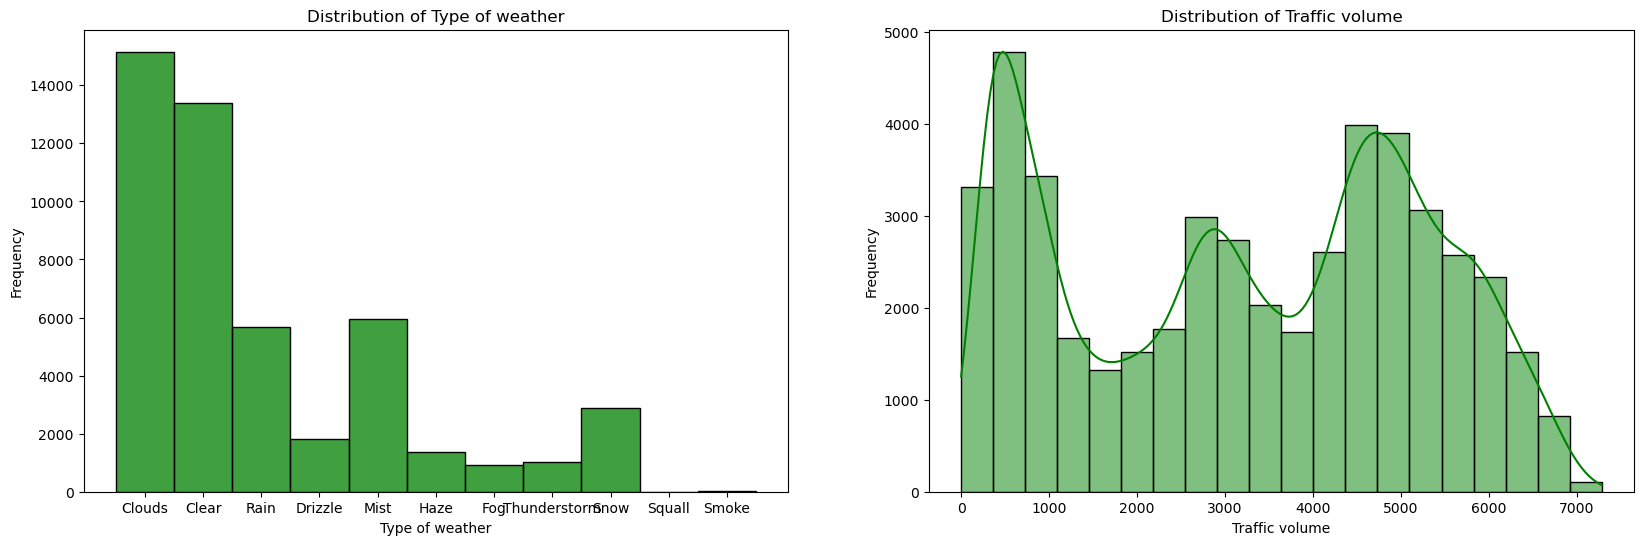

In [118]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['weather_main'], bins=20, color='green')
plt.title('Distribution of Type of weather')
plt.xlabel('Type of weather')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['traffic_volume'], bins=20, kde=True,color='green')
plt.title('Distribution of Traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')

plt.show()

### Box plot for outliers check.

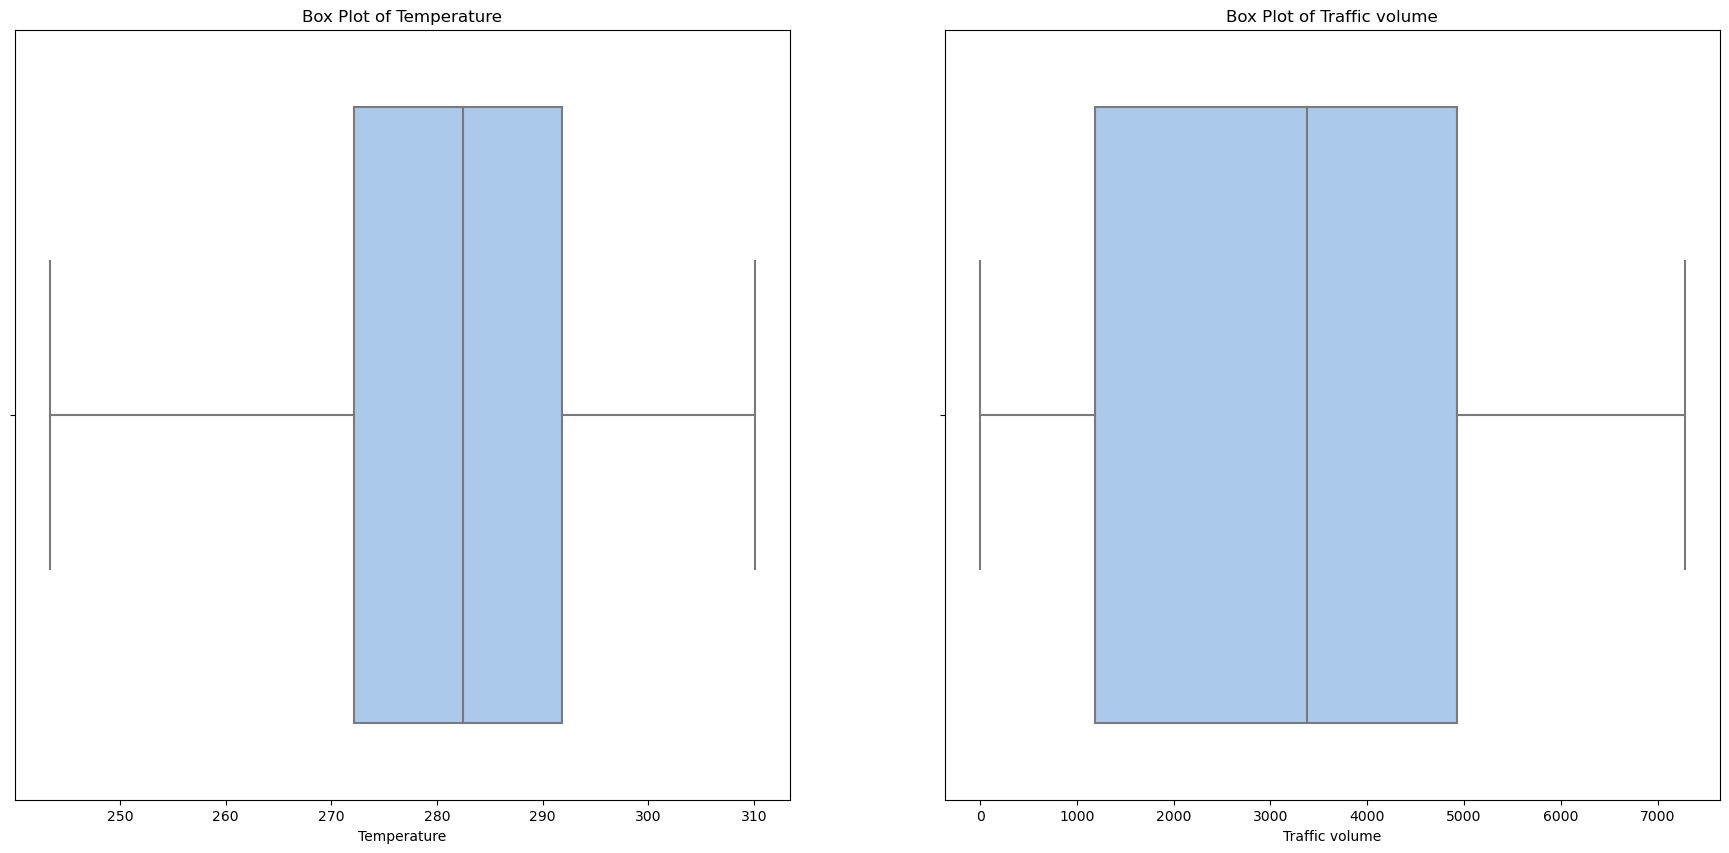

In [119]:
plt.figure(figsize=(22, 10))

plt.subplot(1,2,1)
sns.boxplot(x=df['temp'],palette = ("pastel"))
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')

plt.subplot(1,2,2)

sns.boxplot(x=df['traffic_volume'],palette = ("pastel"))
plt.title('Box Plot of Traffic volume')
plt.xlabel('Traffic volume')
plt.show()

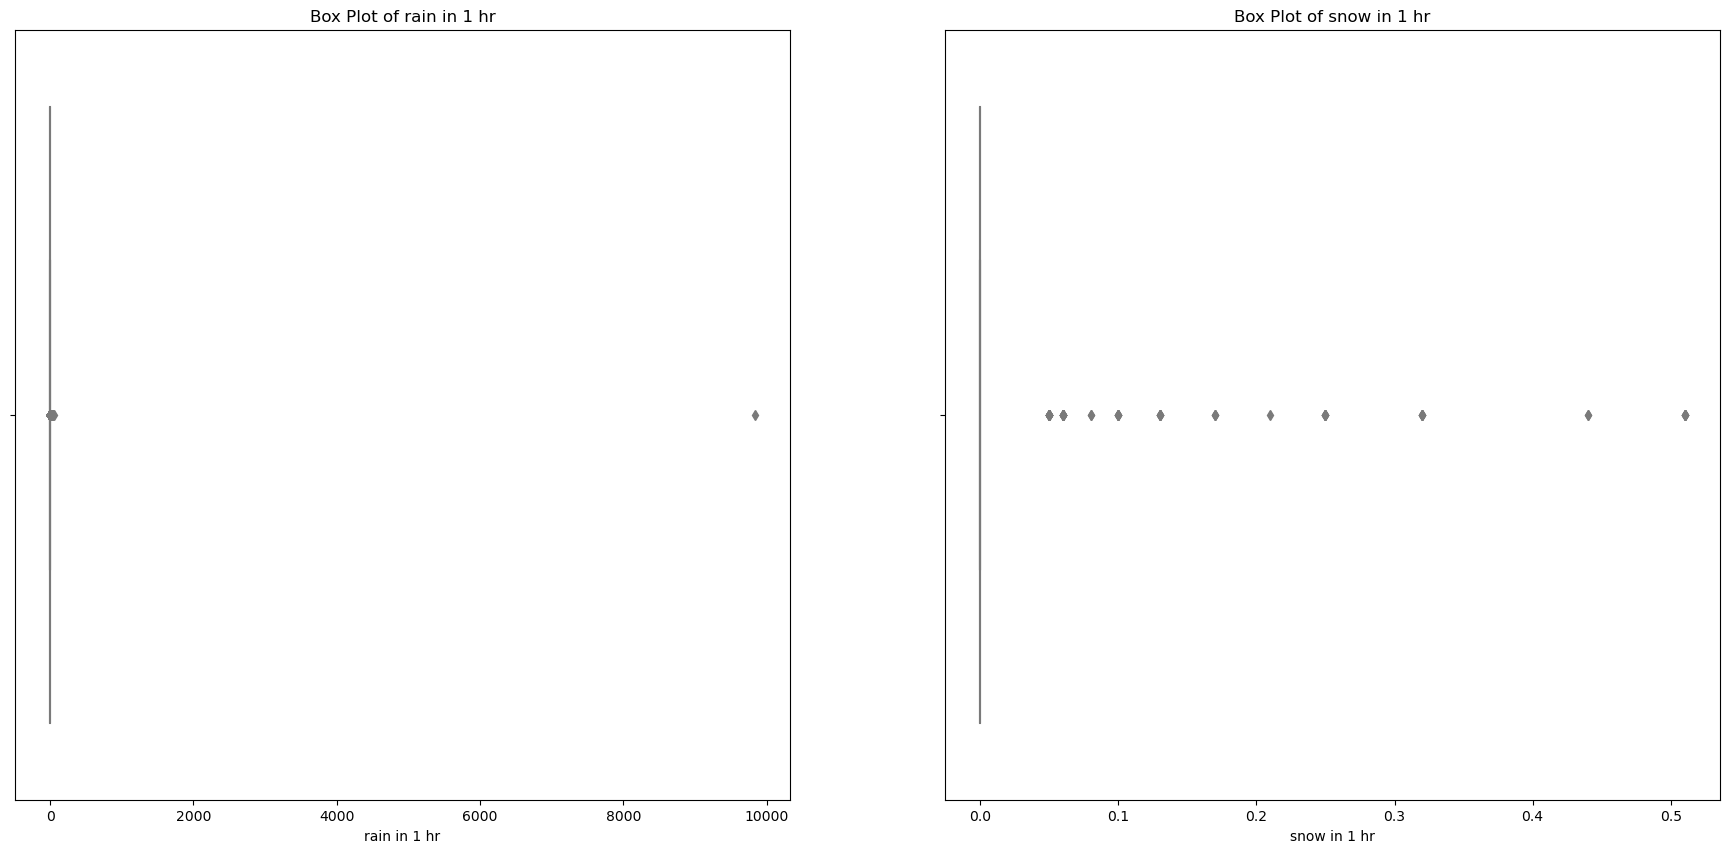

In [120]:
plt.figure(figsize=(22, 10))
plt.subplot(1,2,1)
sns.boxplot(x=df['rain_1h'] ,palette = ("pastel"))
plt.title('Box Plot of rain in 1 hr')
plt.xlabel('rain in 1 hr')

plt.subplot(1,2,2)
sns.boxplot(x=df['snow_1h'],palette = ("pastel"))
plt.title('Box Plot of snow in 1 hr')
plt.xlabel('snow in 1 hr')

plt.show()

## Univariate Analysis

Text(0, 0.5, 'traffic_volume')

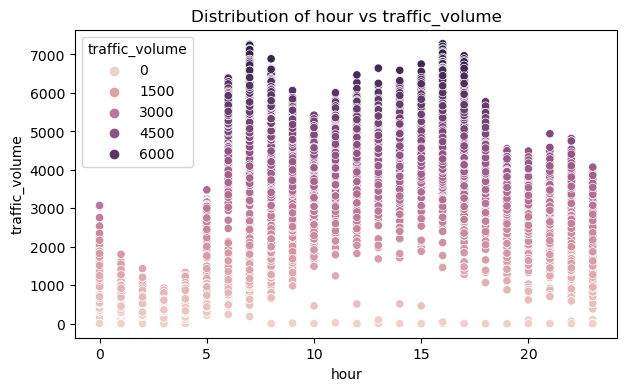

In [121]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='hour', y='traffic_volume', hue='traffic_volume' ,data=df)
plt.title('Distribution of hour vs traffic_volume')
plt.xlabel('hour')
plt.ylabel('traffic_volume')

# plt.subplot(1,2,2)

# sns.scatterplot(x='snow_1h', y='traffic_volume',data=df)
# plt.title('Distribution of Snow in 1 hr vs Traffic volume')
# plt.xlabel('Snow in 1 hr')
# plt.ylabel('Traffic volume')

<Axes: >

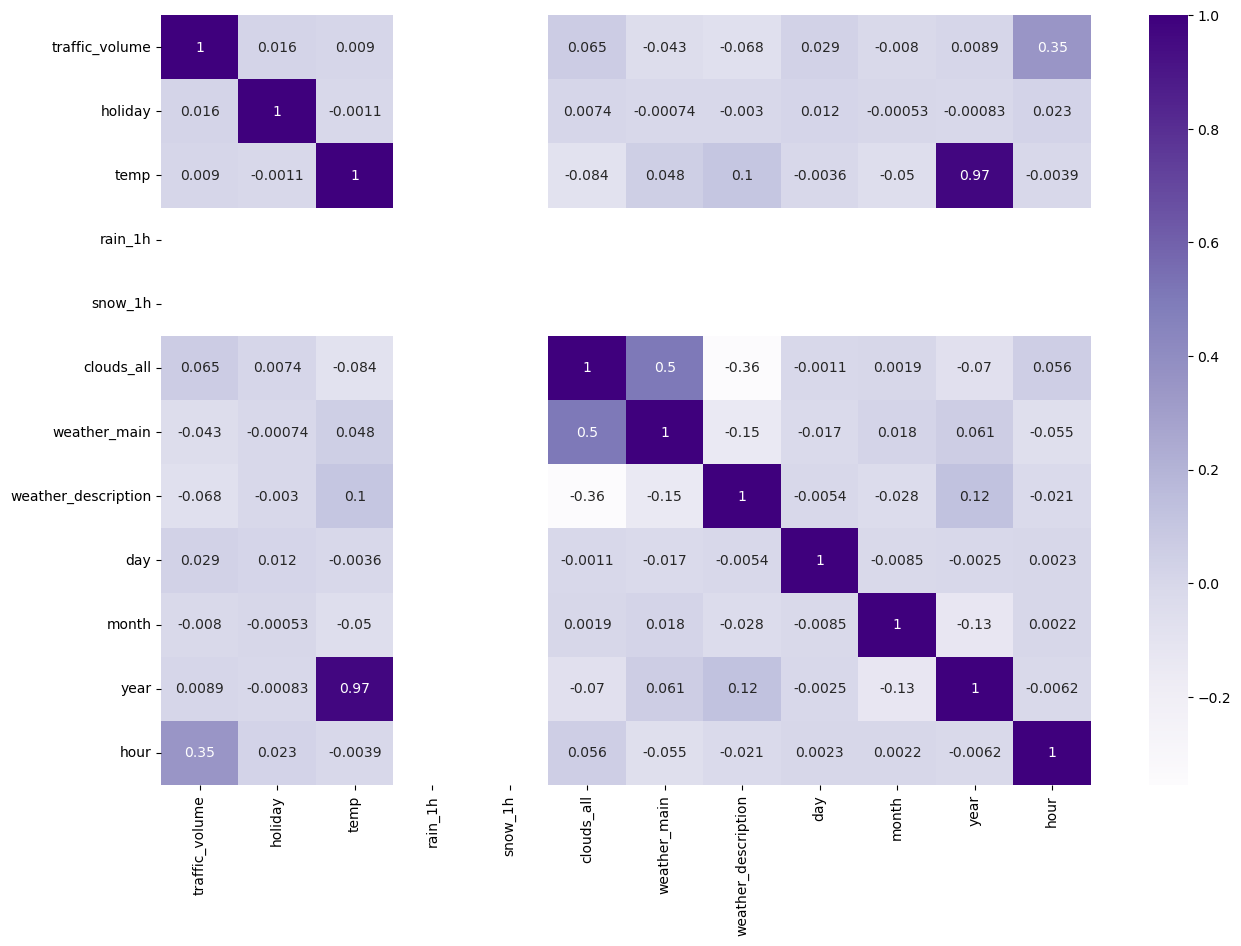

In [138]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True, cmap="Purples")

## Data pre-processing

In [123]:
df.duplicated().sum()

45

In [125]:
df=df.drop_duplicates()

In [126]:
df.duplicated().sum()

0

In [127]:
df_num = df.select_dtypes(include='number')

In [128]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [129]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [131]:
df.shape

(44623, 12)

### Encoding categorical columns

In [133]:
cat_col = ['holiday','weather_main','weather_description','day']
encoder =  LabelEncoder()
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [134]:
df['holiday'].value_counts()

7     44567
9         6
6         6
4         6
1         5
10        5
0         5
11        5
5         5
2         5
8         5
3         3
Name: holiday, dtype: int64

### Standardization

In [135]:
scaler = MinMaxScaler()
df['traffic_volume'] = scaler.fit_transform(df[['traffic_volume']])
df['temp'] = scaler.fit_transform(df[['temp']])

#### Spliting data set for X and y.

In [136]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,7,0.000000,0.0,0.0,20,1,4,0,2,2012,19
1,7,0.003449,0.0,0.0,1,0,27,0,2,2012,20
2,7,0.012448,0.0,0.0,1,0,27,0,2,2012,21
3,7,0.021446,0.0,0.0,1,0,27,0,2,2012,22
4,7,0.021446,0.0,0.0,1,0,27,0,2,2012,23


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,shuffle = True)

## Model Selection

In [139]:
models = {
    'LinearRegression':LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
    }

In [147]:
data = {}
model_list = []
train_r2_score = []
test_r2_score = []
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Prediction 
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    model_name = list(models.keys())[i]
    model_list.append(model_name)
    print('--------------------------------------------------------------------')
    print()    
    print('Model Name :',model_name)
    print('Training Accuracy: ')
    print('mean_absolute_error: ',mean_absolute_error(y_train,pred_train))
    print('mean_squared_error: ',mean_squared_error(y_train,pred_train)) 
    print('r2_score: ',r2_score(y_train,pred_train))
    print()
    print('Testing Accuracy: ')
   
    print('mean_absolute_error: ',mean_absolute_error(y_test,pred_test))
    print('mean_squared_error: ',mean_squared_error(y_test,pred_test)) 
    print('r2_score: ',r2_score(y_test,pred_test))
    print()
    
    train_r2_score.append(r2_score(y_train,pred_train))
    test_r2_score.append(r2_score(y_test,pred_test))

--------------------------------------------------------------------

Model Name : LinearRegression
Training Accuracy: 
mean_absolute_error:  0.2248769577890076
mean_squared_error:  0.06458796441076292
r2_score:  0.13132846897744588

Testing Accuracy: 
mean_absolute_error:  0.22389679330597514
mean_squared_error:  0.06391000665369345
r2_score:  0.14204175376070227

--------------------------------------------------------------------

Model Name : KNN Regression
Training Accuracy: 
mean_absolute_error:  0.06203596532326433
mean_squared_error:  0.009055973584732322
r2_score:  0.8782022856654956

Testing Accuracy: 
mean_absolute_error:  0.0804078031212485
mean_squared_error:  0.015319696988939278
r2_score:  0.7943411204325356

--------------------------------------------------------------------

Model Name : Decision Tree
Training Accuracy: 
mean_absolute_error:  3.8603404373241516e-19
mean_squared_error:  3.3212013943772266e-35
r2_score:  1.0

Testing Accuracy: 
mean_absolute_error:  0.0

### Accuracy Check

In [148]:
data['model'] = model_list
data['train_r2_score'] = train_r2_score
data['test_r2_score'] = test_r2_score

In [149]:
data = pd.DataFrame(data)
data

,model,train_r2_score,test_r2_score
0,LinearRegression,0.131328,0.142042
1,KNN Regression,0.878202,0.794341
2,Decision Tree,1.000000,0.761194


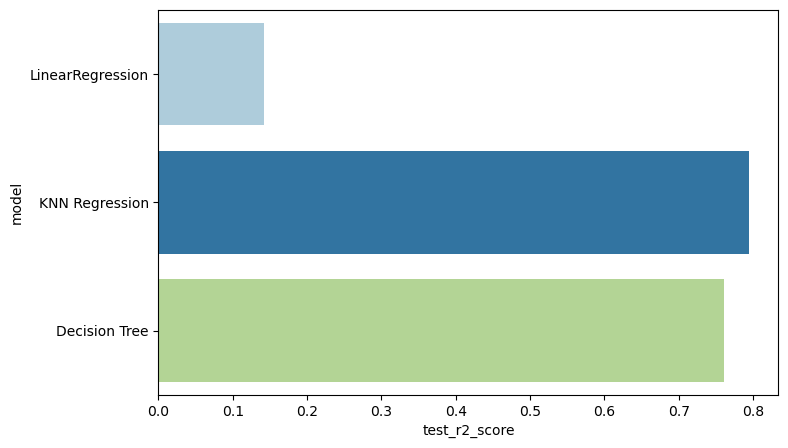

In [175]:
plt.figure(figsize=(8,5))
sns.barplot(y='model',x = 'test_r2_score',data=data,orient='h',palette=sns.color_palette('Paired'))
plt.show()

### Highest Accuracy is given by KNN Regression model : 0.7943